# Trabalho de TDS para análise de gráficos de acidentes pelo Python
### Nome: Matheus Rogerio Pesarini
### Professor: Leonardo Medeiros
-----

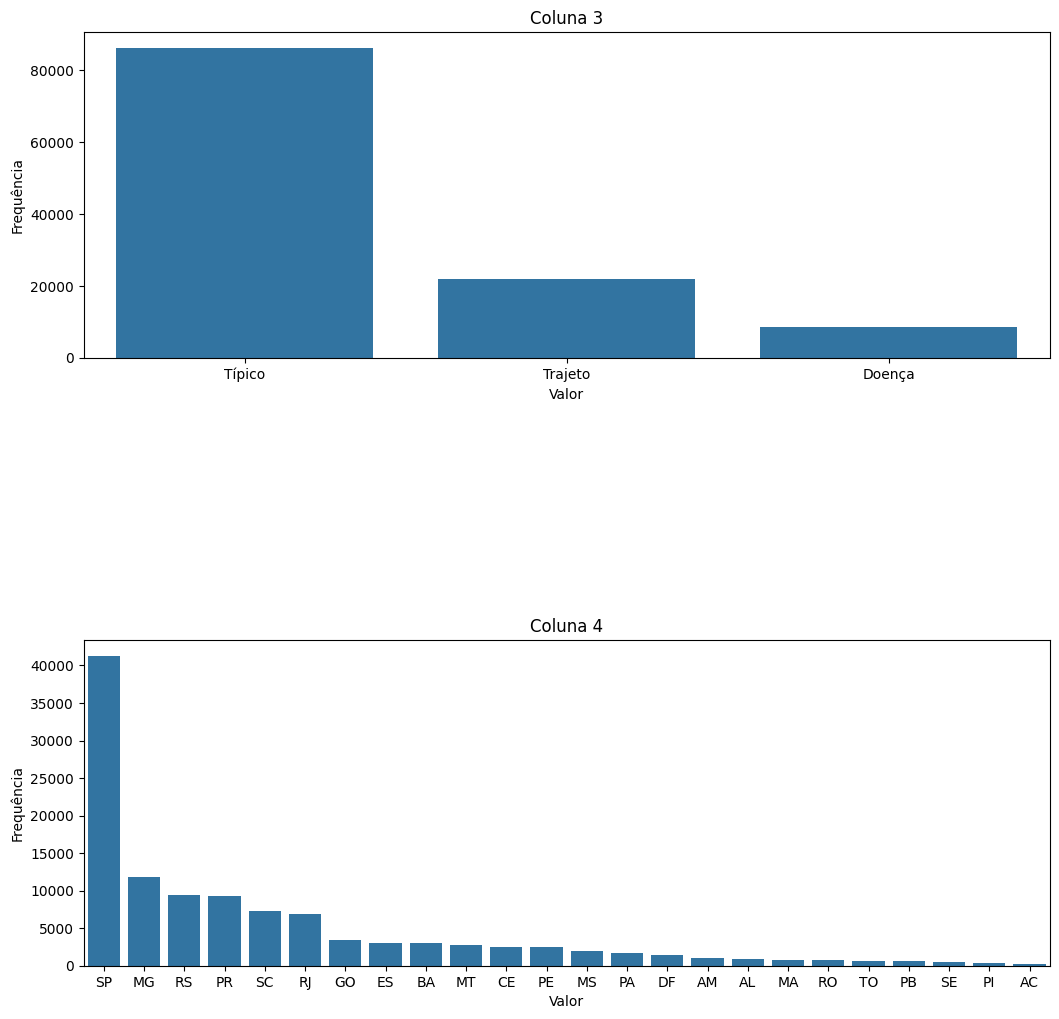

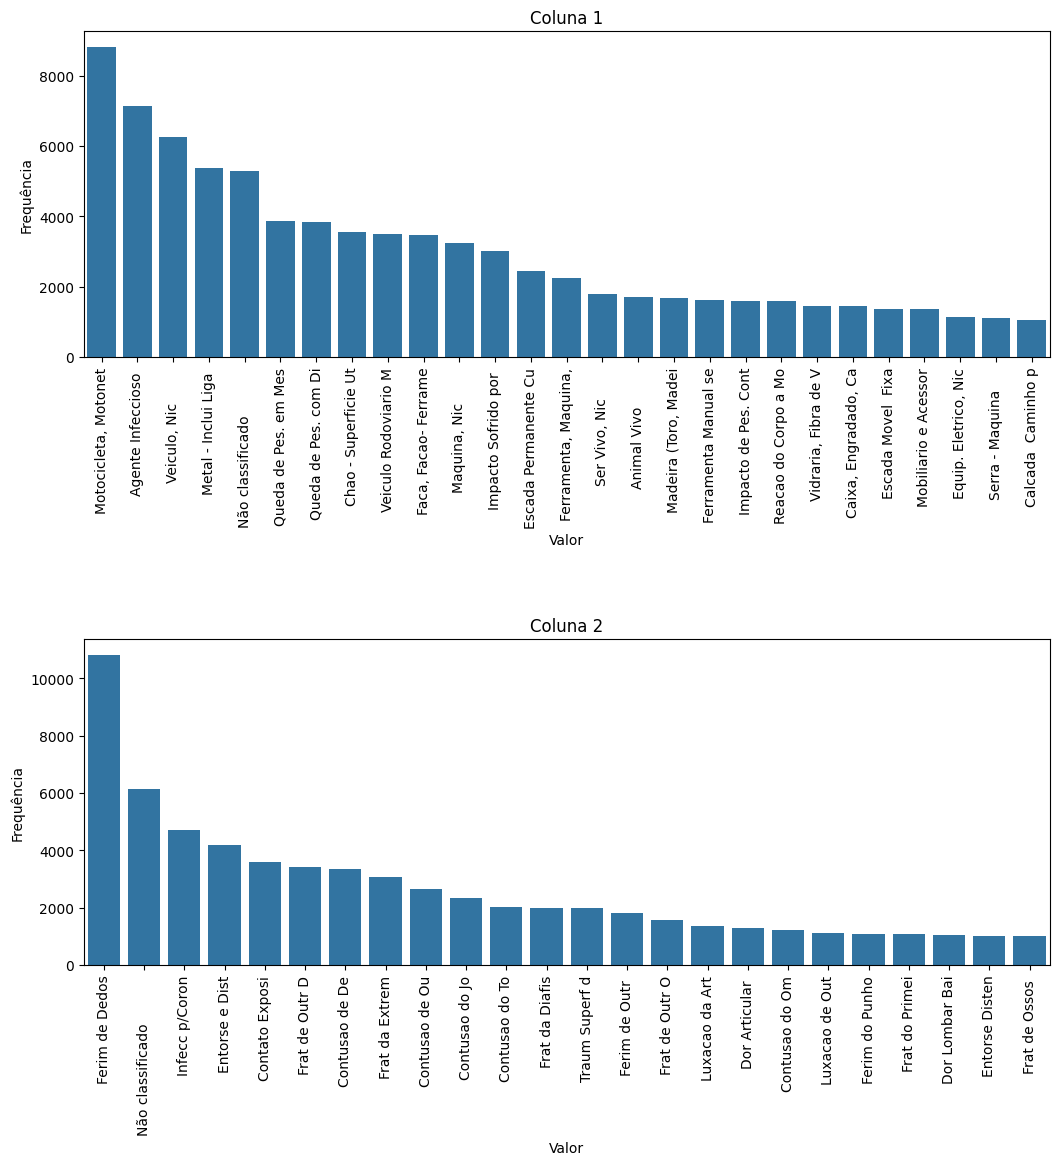

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_excel("acidentes.xlsx")

# abreviações dos estados
abreviacoes = { 
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

# Substituindo os nomes dos estados pelas abreviações
dados.iloc[:, 3] = dados.iloc[:, 3].map(abreviacoes)

# Criando uma primeira tela com dois subplots para melhor organização
fig1, axs1 = plt.subplots(2, 1, figsize=(12,12))

# Segunda tela com outros dois subplots
fig2, axs2 = plt.subplots(2, 1, figsize=(12,12))

axs = [axs1[0], axs1[1], axs2[0], axs2[1]]

for i in range(4):
    coluna = dados.iloc[:, i]

    frequencia = coluna.value_counts()

    # Se a coluna é a primeira ou a segunda
    if i < 2:
        # Filtrando os valores com frequência maior que 1000
        frequencia = frequencia[frequencia > 1000]
    # Se é a terceira coluna
    elif i == 2:
        # Selecionando apenas os três valores mais frequentes para melhor visualização
        frequencia = frequencia.nlargest(3)
    # Se é a quarta coluna
    elif i == 3:
        # Selecionando apenas os 24 valores mais frequentes para melhor visualização
        frequencia = frequencia.nlargest(24)

    # Plotando o gráfico
    sns.barplot(x=frequencia.index, y=frequencia.values, ax=axs[i])
    axs[i].set_title('Coluna ' + str(i+1))
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frequência')

    if i < 2:
        # Rotacionando as palavras no eixo x para a vertical para melhor visualização
        plt.sca(axs[i])
        plt.xticks(rotation=90)

# Ajustando a exibição da tela
fig1.subplots_adjust(bottom=0.162, right=0.93, top=0.94, hspace=0.867)

fig2.subplots_adjust(bottom=0.162, right=0.93, top=0.94, hspace=0.867)

plt.show()

----
># Análise dos gráficos
> - ### O gráfico da coluna 1 com os diferentes tipos específicos de acidente, demonstra uma grande quantidade de acidentes no transito, ferramente cortantes e no início do auge da pandemia no final de 2020 já está demonstrando forte presença em segundo lugar.
> - ### O gráfico da coluna 2 com as partes do corpo que foram afetadas pelos acidentes, tem em primeiro lugar os ferimentos nos dedos com cortes, queimaduras, fraturas e esmagamentos, em segundo lugar os não classificados e em terceiro lugar a forte presença da Covid como maior agente infeccioso e no resto do gráfico diversas fraturas e contusões.
> - ### O gráfico da coluna 3 com acidentes de trajeto entre o trabalho e outro local como a casa, acidentes típico no local de trabalho e acidentes por doença.
> - ### Por último o gráfico da coluna 4 mostra em quantidade de acidentes por cada estado do Brasil, sendo diretamente relacionados a população em cada um deles com São Paulo em primeiro.

